In [3]:
#importing pandas before uploading my raw data 
import pandas as pd
import numpy as np

In [4]:
#checking numpy version to add to my requirements file 

np.__version__

'1.26.4'

In [5]:
#checking pandas version to add to my requirements file 

pd.__version__

'2.2.1'

In [6]:
data_path = "../data/raw/bank-additional-full.csv"
raw_bank_df = pd.read_csv(data_path)

In [7]:
raw_bank_df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [8]:
#the initial issue is that all the data is in one column and row. 
#will first split the column names: 

one_initial_column = raw_bank_df.columns
column_names = one_initial_column[0].split(';')

In [9]:
def clean_string(input_string):
    """
    Defining a function to clean non-alphabetic characters but replace '.', ' ', with '_'
    then will use map to apply the function 
    """
    cleaned_string = ""
    for char in input_string:
        if char.isalpha() or char.isdigit() or char in ['.', ' ', '_']:
            cleaned_string += char
    
    cleaned_string = cleaned_string.replace('.','_').replace(' ','_')
    return cleaned_string

#applying the function to each elemen in column_names to finalise the formatting 
     
cleaned_column_names = list(map(clean_string, column_names))
print(f"cleaned column names are {cleaned_column_names}")

cleaned column names are ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [10]:
#assigning the current one column name as the_column for easier applicaiton 

the_column = 'age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'

In [11]:
#creating my data frame with these column names and corresponding values, original values were all 
#under one column. Using slicing to create my data frame 

new_data = []
for index, row in raw_bank_df.iterrows():
    values = row[the_column].replace('"',"").split(';')
    row_dict = dict(zip(cleaned_column_names, values))
    new_data.append(row_dict)

new_raw_bank_df = pd.DataFrame(new_data)

In [12]:
#checking for null values, no null 
#new_raw_bank_df.isnull().sum() because null values are tagged as unknown
# will change to nan to come up with a better strategy for filling 

new_raw_bank_df.replace('unknown', np.nan, inplace=True)

#decided to drop all null values as there are not much comparing the shapes before/after 

new_raw_bank_df.dropna(how='any', inplace=True)

new_raw_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
#some numeric data have incorrect data type, will be changing accordingly: 

numeric_columns = ["age", "duration", "pdays", "previous",
                   "emp_var_rate", "cons_price_idx","cons_conf_idx",
                   "euribor3m", "nr_employed"
                  ]
for column in numeric_columns:
    new_raw_bank_df[column] = new_raw_bank_df[column].astype(float)

In [14]:
#checking for duplicates 
new_raw_bank_df.duplicated().sum()

#deleting duplicates 
new_raw_bank_df.drop_duplicates(inplace=True)

In [15]:
new_raw_bank_df.reset_index(drop=True, inplace=True)

In [16]:
#since our key value is Y column, changing it to numeric for easier anlysis 

new_raw_bank_df['y'] = new_raw_bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [18]:
#grouping data by job and sum of Y
grouped_by_education = new_raw_bank_df.groupby('education')['y'].sum().reset_index()

In [21]:
#total number of people per job 
education_value_count = new_raw_bank_df.education.value_counts().reset_index()

In [22]:
#merging to see total number of people and total number of purchasers by job 

merged_education_grouped = pd.merge(grouped_by_education, education_value_count, on='education')
#adding a new column to see the percentage of purchasers to total number of people, by job 

merged_education_grouped['%'] = (merged_education_grouped['y']*100/merged_education_grouped['count']).round(1)
merged_education_grouped.drop(['y', 'count'], axis=1, inplace=True)

#this is the percentage of successfull sales per jobs 
merged_education_grouped

,education,%
0,basic.4y,13.7
1,basic.6y,9.8
2,basic.9y,8.9
3,high.school,12.1
4,illiterate,27.3
5,professional.course,12.5
6,university.degree,14.8


In [23]:
#percentage of total buyers per contact type 

grouped_by_contacts = new_raw_bank_df.groupby('contact')['y'].sum().reset_index()

contact_count = new_raw_bank_df['contact'].value_counts()

merged_contact_grouped = pd.merge(grouped_by_contacts, contact_count, on='contact')

merged_contact_grouped['%'] = (merged_contact_grouped['y']*100/merged_contact_grouped['count']).round(1)
merged_contact_grouped.drop(['y','count'], axis=1, inplace=True)
merged_contact_grouped

,contact,%
0,cellular,16.0
1,telephone,5.8


In [28]:
new_raw_bank_df['age_interval'] = pd.cut(new_raw_bank_df['age'], 
                                          bins=[18, 25, 35, 45, 55, 65, 100], 
                                          labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'], 
                                          right=False)

#grouped_by_job_age_intervals = new_raw_bank_df.groupby(['job', 'age_interval'])['y'].sum().reset_index()

#contact_count = grouped_by_job_age_intervals['job'].value_counts()
#grouped_by_job_age_intervals\
pivot = pd.pivot_table(
                  new_raw_bank_df,
                  values = 'y',
                  index='education',
                  columns='age_interval',
                  aggfunc = 'sum'
                
)

/var/folders/q1/bq_b0f_d53ldgrm4rh3vh1_40000gn/T/ipykernel_10765/3288836294.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


In [29]:
def percentage_calculate(df, column_names):
    for column in column_names:
        df[column] = (df[column] * 100 / df['y']).round(2)
    return df

merged_pivot= pd.merge(pivot, grouped_by_education, on='education')
merged_pivot
column_names = list(merged_pivot.columns)
column_names.pop(0)

percentage_df = merged_pivot.copy()
percentage_df = percentage_calculate(percentage_df, column_names)

In [30]:
percentage_df = merged_pivot.copy()
percentage_df = percentage_calculate(percentage_df, column_names)

In [31]:
percentage_df

,education,18-25,26-35,36-45,46-55,56-65,66+,y
0,basic.4y,2.76,7.67,8.90,13.50,25.46,41.72,100.0
1,basic.6y,5.88,26.47,36.03,22.79,2.21,6.62,100.0
2,basic.9y,7.63,37.37,25.00,18.95,9.21,1.84,100.0
3,high.school,9.74,41.33,25.27,12.96,7.82,2.89,100.0
4,illiterate,0.00,33.33,33.33,33.33,0.00,0.00,100.0
5,professional.course,4.65,37.36,26.39,15.06,10.97,5.58,100.0
6,university.degree,2.40,44.78,27.26,15.12,8.05,2.40,100.0


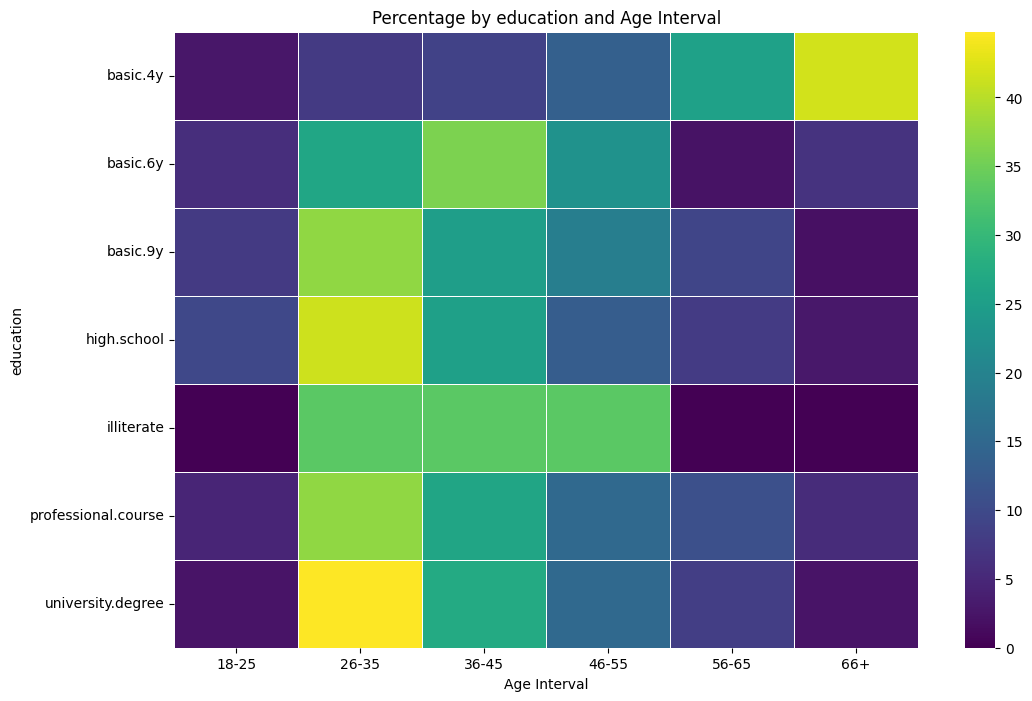

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming percentage_df is your DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_df.set_index('education').drop(columns='y'), annot=False, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Percentage by education and Age Interval')
plt.xlabel('Age Interval')
plt.ylabel('education')
plt.show()